# LOGISTIC REGRESSION

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Data Exploration:

### Load the dataset 

In [6]:
Train = pd.read_csv(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\Completed\Logistic Regression\Titanic_train.csv")
Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
Test = pd.read_csv(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\Completed\Logistic Regression\Titanic_test.csv")
Test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Train data

In [9]:
X_train = Train
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
X_test = Test
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### To visualizations such as histograms, box plots for features and target for both train and test data

#### Histogram graph for X_train

<Axes: ylabel='Count'>

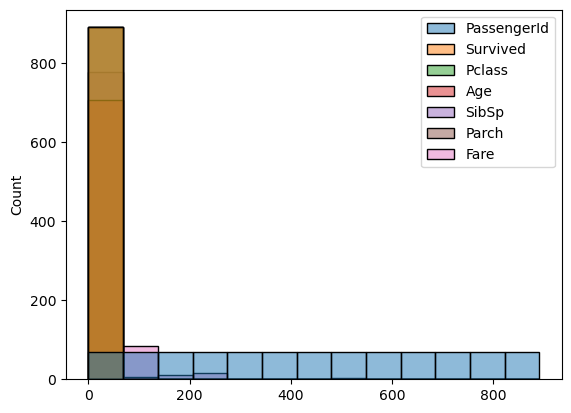

In [13]:
X_train_histgraph = sns.histplot(X_train,binwidth=70)
X_train_histgraph

#### Box graph for X_train

<Axes: >

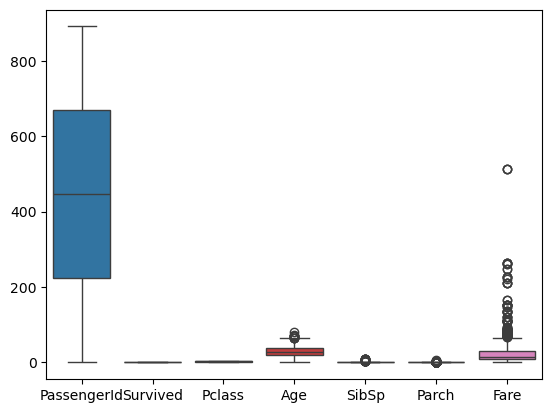

In [15]:
train_boxgraph = sns.boxplot(X_train)
train_boxgraph 

#### Histogram graph for X_test

<Axes: ylabel='Count'>

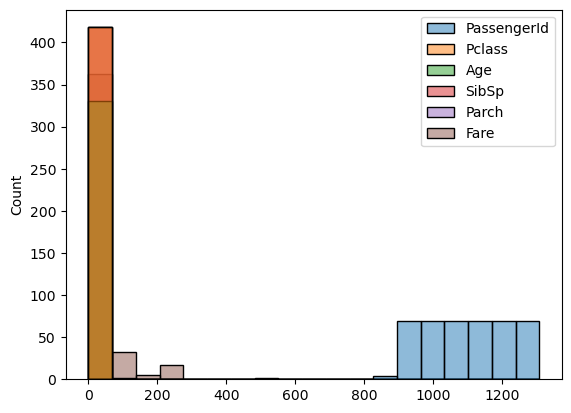

In [17]:
X_test_histgraph = sns.histplot(X_test,binwidth=70)
X_test_histgraph 

#### Box graph for X_test

<Axes: >

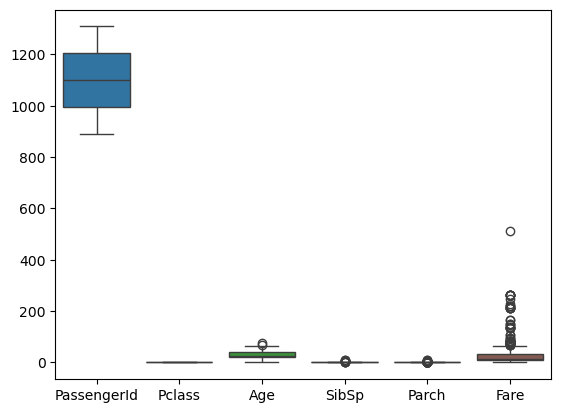

In [19]:
X_test_boxgraph = sns.boxplot(X_test)
X_test_boxgraph

## Data Preprocessing:

#### To check whether it has null values or not

In [22]:
Train_null_values = Train.isnull().sum()
Train_null_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### --> To observed above output Age, Cabin and Embarked has null values in train data.

In [24]:
Test_null_values = Test.isnull().sum()
Test_null_values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### --> To observed above output Age and Cabin has null values in test data.

## To find mean,median and mode for replacing in the place of null values.

### Train data mean ,median and mode.

In [28]:
mean_train = Train['Age'].mean()
mean_train

29.69911764705882

In [29]:
median_train = Train['Age'].median()
median_train

28.0

In [30]:
mode_train1 = Train['Cabin'].mode()
mode_train1

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [31]:
mode_train2 = Train['Embarked'].mode()
mode_train2

0    S
Name: Embarked, dtype: object

### Test data mean ,median and mode.¶

In [33]:
mean_test = Test['Age'].mean()
mean_test

30.272590361445783

In [34]:
median_test = Test['Age'].median()
median_test

27.0

In [35]:
mode_test = Test['Cabin'].mode()
mode_test

0    B57 B59 B63 B66
Name: Cabin, dtype: object

### The process to remove null values from the features in train data.

In [37]:
x_train = Train.fillna({'Age':mean_train,'Cabin':mode_train1[0],'Embarked':mode_train2[0]})

### The process to remove null values from the features in test data.

In [39]:
x_test = Test.fillna({'Age':mean_test,'Cabin':mode_test[0]})

### To find numerical columns and categrical columns saperately train data

In [60]:
Num_col_train = [i for i in x1_train.columns if x1_train[i].dtype != 'O']
Num_col_train 

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [62]:
cat_col_train = [i for i in x1_train.columns if x1_train[i].dtype == 'O']
cat_col_train 

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### To find numerical columns and categrical columns saperately test data.

In [65]:
Num_col_test = [i for i in x_test.columns if x_test[i].dtype != 'O']
Num_col_test

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [67]:
cat_col_test = [i for i in x_test.columns if x_test[i].dtype == 'O']
cat_col_test

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### Saperation of target and features.

In [70]:
x1_train = x_train.drop(columns='Survived')
x1_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [72]:
y1_train = x_train[['Survived']]
y1_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [74]:
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


### convertion of categrical data into numerical for train data .

In [77]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [78]:
ord_end =make_pipeline(OrdinalEncoder())

In [81]:
trans = ColumnTransformer([('ordinal',ord_end,cat_col_train)])
trans

ColumnTransformer(transformers=[('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Name', 'Sex', 'Ticket', 'Cabin',
                                  'Embarked'])])

In [83]:
df1_train_col=pd.DataFrame(trans.fit_transform(x_train))
df1_train_col

,0,1,2,3,4
0,108.0,1.0,523.0,47.0,2.0
1,190.0,0.0,596.0,81.0,0.0
2,353.0,0.0,669.0,47.0,2.0
3,272.0,0.0,49.0,55.0,2.0
4,15.0,1.0,472.0,47.0,2.0
...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0
887,303.0,0.0,14.0,30.0,2.0
888,413.0,0.0,675.0,47.0,2.0
889,81.0,1.0,8.0,60.0,0.0


### Apllying standardscalar for numerical columns train data.

In [86]:
std = make_pipeline(StandardScaler())

In [88]:
transf = ColumnTransformer([('standard',std,Num_col_train)])
transf

ColumnTransformer(transformers=[('standard',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['PassengerId', 'Pclass', 'Age', 'SibSp',
                                  'Parch', 'Fare'])])

In [11]:
df1_train_Num = pd.DataFrame(transf.fit_transform(x_train))
df1_train_Num

NameError: name 'pd' is not defined

### To combine numerical and categrical columns.

In [93]:
freatures1 = pd.concat([df1_train_col,df1_train_Num],axis=1,ignore_index=True)
old_name = range(0,5)
new_name = cat_col_train
old_name1 = range(5,11)
new_name1 = Num_col_train
x2_train = freatures1.rename(columns=dict(zip(old_name,new_name)))
x2_train

,Name,Sex,Ticket,Cabin,Embarked,5,6,7,8,9,10
0,108.0,1.0,523.0,47.0,2.0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,81.0,0.0,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,47.0,2.0,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,55.0,2.0,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,47.0,2.0,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,30.0,2.0,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,47.0,2.0,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,60.0,0.0,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [13]:
x2_train = x2_train.rename(columns=dict(zip(old_name1,new_name1)))
x2_train

NameError: name 'x2_train' is not defined

### convertion of categrical data into numerical for test data .

In [98]:
ord_endt = make_pipeline(OrdinalEncoder())

In [100]:
transd = ColumnTransformer([('ordinal',ord_endt,cat_col_test)])
transd

ColumnTransformer(transformers=[('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Name', 'Sex', 'Ticket', 'Cabin',
                                  'Embarked'])])

In [102]:
df2_col_test = pd.DataFrame(transd.fit_transform(x_test))
df2_col_test

,0,1,2,3,4
0,206.0,1.0,152.0,15.0,1.0
1,403.0,0.0,221.0,15.0,2.0
2,269.0,1.0,73.0,15.0,1.0
3,408.0,1.0,147.0,15.0,2.0
4,178.0,0.0,138.0,15.0,2.0
...,...,...,...,...,...
413,353.0,1.0,267.0,15.0,2.0
414,283.0,0.0,324.0,22.0,0.0
415,332.0,1.0,346.0,15.0,2.0
416,384.0,1.0,220.0,15.0,2.0


### Apllying standardscalar for numerical columns for test data.

In [105]:
stdq = make_pipeline(StandardScaler())

In [107]:
transf = ColumnTransformer([('standard',stdq,Num_col_test)])
transf

ColumnTransformer(transformers=[('standard',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['PassengerId', 'Pclass', 'Age', 'SibSp',
                                  'Parch', 'Fare'])])

In [109]:
df2_num_test = pd.DataFrame(transf.fit_transform(x_test))
df2_num_test

,0,1,2,3,4,5
0,-1.727912,0.873482,0.334993,-0.499470,-0.400248,-0.497811
1,-1.719625,0.873482,1.325530,0.616992,-0.400248,-0.512660
2,-1.711337,-0.315819,2.514175,-0.499470,-0.400248,-0.464532
3,-1.703050,0.873482,-0.259330,-0.499470,-0.400248,-0.482888
4,-1.694763,0.873482,-0.655545,0.616992,0.619896,-0.417971
...,...,...,...,...,...,...
413,1.694763,0.873482,0.000000,-0.499470,-0.400248,-0.493856
414,1.703050,-1.505120,0.691586,-0.499470,-0.400248,1.312180
415,1.711337,0.873482,0.651965,-0.499470,-0.400248,-0.508183
416,1.719625,0.873482,0.000000,-0.499470,-0.400248,-0.493856


### To combine numerical and categrical columns.

In [112]:
fraturs2 = pd.concat([df2_col_test,df2_num_test],axis=1,ignore_index=True)
olds_name = range(0,5)
news_name = cat_col_train
olds_name1 = range(5,11)
news_name1 = Num_col_train
x2_test = freatures1.rename(columns=dict(zip(olds_name,news_name)))
x2_test

,Name,Sex,Ticket,Cabin,Embarked,5,6,7,8,9,10
0,108.0,1.0,523.0,47.0,2.0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,81.0,0.0,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,47.0,2.0,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,55.0,2.0,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,47.0,2.0,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,30.0,2.0,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,47.0,2.0,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,60.0,0.0,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [114]:
x2_test = x2_test.rename(columns=dict(zip(olds_name1,news_name1)))
x2_test

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,108.0,1.0,523.0,47.0,2.0,-1.730108,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,81.0,0.0,-1.726220,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,47.0,2.0,-1.722332,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,55.0,2.0,-1.718444,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,47.0,2.0,-1.714556,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,47.0,2.0,1.714556,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,30.0,2.0,1.718444,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,47.0,2.0,1.722332,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,60.0,0.0,1.726220,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


### After EDA process we got new data.

In [117]:
print(x2_train)
print(y1_train)
print(x2_test)

      Name  Sex  Ticket  Cabin  Embarked  PassengerId    Pclass       Age  \
0    108.0  1.0   523.0   47.0       2.0    -1.730108  0.827377 -0.592481   
1    190.0  0.0   596.0   81.0       0.0    -1.726220 -1.566107  0.638789   
2    353.0  0.0   669.0   47.0       2.0    -1.722332  0.827377 -0.284663   
3    272.0  0.0    49.0   55.0       2.0    -1.718444 -1.566107  0.407926   
4     15.0  1.0   472.0   47.0       2.0    -1.714556  0.827377  0.407926   
..     ...  ...     ...    ...       ...          ...       ...       ...   
886  548.0  1.0   101.0   47.0       2.0     1.714556 -0.369365 -0.207709   
887  303.0  0.0    14.0   30.0       2.0     1.718444 -1.566107 -0.823344   
888  413.0  0.0   675.0   47.0       2.0     1.722332  0.827377  0.000000   
889   81.0  1.0     8.0   60.0       0.0     1.726220 -1.566107 -0.284663   
890  220.0  1.0   466.0   47.0       1.0     1.730108  0.827377  0.177063   

        SibSp     Parch      Fare  
0    0.432793 -0.473674 -0.502445  
1  

# Model Building:

### Training of logisticRegression

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [123]:
log_reg = LogisticRegression()

In [125]:
log_reg.fit(x2_train,y1_train)

LogisticRegression()

### To find the Y_predict.

In [128]:
Y_pred = log_reg.predict(x2_train)
Y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [130]:
auc_score = accuracy_score(y1_train,Y_pred)
auc_score

0.813692480359147

### To observed above output our mobel is working good.

In [133]:
log_proba = log_reg.predict_proba(x2_train)[:,1]

In [135]:
auc_score =roc_auc_score (y1_train,log_proba)
auc_score

0.8587383759946313

### The above output tells about ROC curve comes more than 50%.

In [138]:
fpr, tpr, thr = roc_curve(y1_train,log_proba)

### Ploting the ROC Curve in the graph for better understanding.

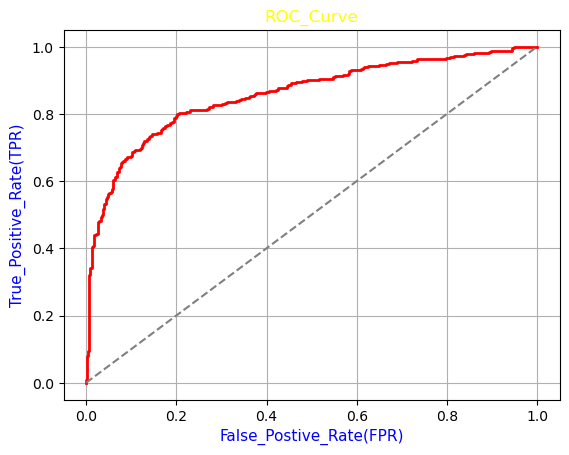

In [141]:
plt.plot(fpr, tpr, lw=2, color='red', label=f'AUC: {auc_score: .2f}')
plt.plot([0,1],[0,1],linestyle='--', color='grey' )
plt.title('ROC_Curve',color='yellow')
plt.xlabel('False_Postive_Rate(FPR)', color='blue', size=11)
plt.ylabel('True_Positive_Rate(TPR)', color='blue', size=11)
plt.grid()

#### We finded the ROC_Curve in the graph.